In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['aii ki matra',
 'cha',
 'ee ki matra',
 'ka',
 'la',
 'ma',
 'ma with oo ki matra',
 'nna',
 'nnna',
 'nu',
 'oo',
 'pa',
 'ra',
 'tha',
 'va',
 'vee',
 'vu',
 'ya']

In [3]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [4]:
data, labels = load_images(MAIN_DIR)

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=18) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2279, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [6]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (1823, 224, 224, 3)
Train Labels Shape: (1823,)
Test Data Shape: (456, 224, 224, 3)
Test Labels Shape: (456,)


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=18)
test_labels = to_categorical(test_labels, num_classes=18)

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=norm_data.shape[1:])

# Create a new model
model = Sequential()

# Add the VGG16 model as a layer
model.add(vgg16)

# Add additional layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
57/57 [==============================] - 1479s 26s/step - loss: 5.0610 - accuracy: 0.0845 - val_loss: 2.8641 - val_accuracy: 0.1228
Epoch 2/50
57/57 [==============================] - 1441s 25s/step - loss: 2.8726 - accuracy: 0.0982 - val_loss: 2.8595 - val_accuracy: 0.1228
Epoch 3/50
57/57 [==============================] - 1441s 25s/step - loss: 2.8712 - accuracy: 0.0982 - val_loss: 2.8641 - val_accuracy: 0.1228
Epoch 4/50
57/57 [==============================] - 1431s 25s/step - loss: 2.8722 - accuracy: 0.0982 - val_loss: 2.8617 - val_accuracy: 0.1228
Epoch 5/50
57/57 [==============================] - 1433s 25s/step - loss: 2.8709 - accuracy: 0.0982 - val_loss: 2.8591 - val_accuracy: 0.1228
Epoch 6/50
57/57 [==============================] - 1431s 25s/step - loss: 2.8701 - accuracy: 0.0982 - val_loss: 2.8593 - val_accuracy: 0.1228
Epoch 7/50
57/57 [==============================] - 1427s 25s/step - loss: 2.8702 - accuracy: 0.0982 - val_loss: 2.8595 - val_accuracy: 0.1228

In [9]:
model.save("VGG16_1.h5")

In [10]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

15/15 [==============================] - 96s 6s/step - loss: 2.8592 - accuracy: 0.1228
Test Loss: 2.859229564666748
Accuracy: 12.280701754385964


In [11]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

15/15 [==============================] - 96s 6s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        22
           2       0.12      1.00      0.22        56
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        24
          16       0.00     

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 18)                73746     
                                                                 
Total params: 134,334,290
Trainable params: 134,334,290
Non-trainable params: 0
_________________________________________________________________


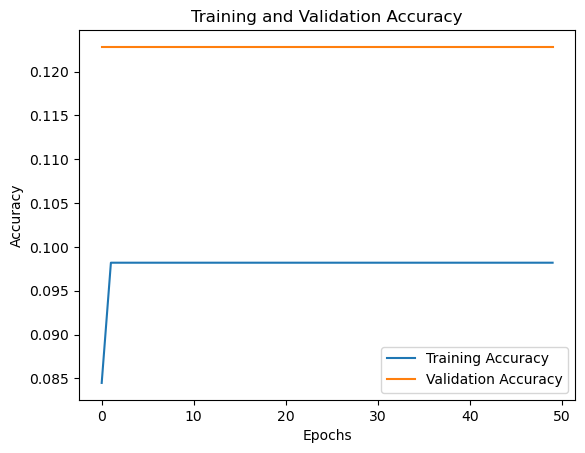

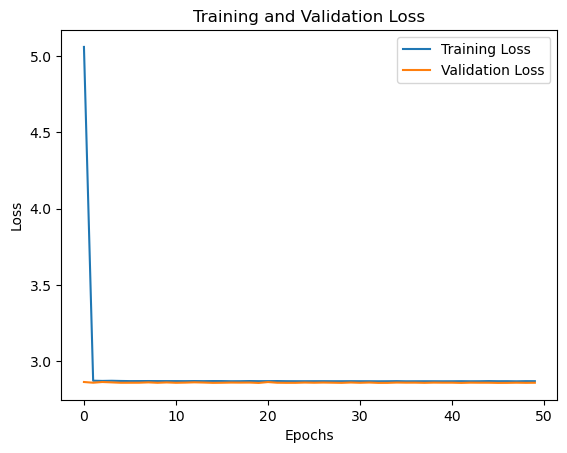

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()